## **Contents of the Workbook :**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **Step - 1 :** *Importing Necesaary Libraries and Datasets*

### **Step - 1.1 :** *Importing Necesaary Packages & Libraries*

In [ ]:
!pip install import_ipynb
!pip install -q -U "tensorflow-text==2.8.*"


In [ ]:
!pip freeze 


In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Scikit-learn

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score


# Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')

# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


# Utility
import string
import re
import numpy as np
import os
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict

# Warnings
import warnings 
warnings.filterwarnings('ignore')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
%cd '/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/'

import import_ipynb
import preprocessing_module as preprocessing
import visualization_module as visualization

/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src
importing Jupyter notebook from preprocessing_module.ipynb
importing Jupyter notebook from visualization_module.ipynb


### **Step - 1.2 :** *Importing Dataset*

In [ ]:
# Varaibles related to dataset
# DATASET_COLUMNS = ["clean_text", "category"]
# DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# Parameters related to KERAS
SEQUENCE_LENGTH = 150
EPOCHS = 10
BATCH_SIZE = 128

# Variables for Exporting purpose
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "/content/tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

# MISC

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250


In [ ]:
#abstraction
'''
test_csv_path = '/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/files/unlabelled/for_test/test_model.csv'
TOKENIZER_MODEL = "/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/model/tokenizer.pkl"

model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/model/final/model.h5')
testing_df = pd.read_csv(test_csv_path)

testing_df = preprocessing.drop_duplicates(testing_df)
testing_df = preprocessing.cleaning(testing_df, prediction=True)
testing_df.head()

with open(TOKENIZER_MODEL, 'rb') as handle:
    tokenizer_loaded = pickle.load(handle)

testing_df_txt2seq = pad_sequences(tokenizer_loaded.texts_to_sequences(testing_df.cleaned_sentence), maxlen=SEQUENCE_LENGTH)

y_pred_score = model_loaded.predict(testing_df_txt2seq)
y_pred_conf_score, y_pred_label = pred_score2label(y_pred_score)

pred_df = output_pred_csv(testing_df, y_pred_conf_score, y_pred_label)
pred_df.head(20)
'''

'\ntest_csv_path = \'/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/files/unlabelled/for_test/test_model.csv\'\nTOKENIZER_MODEL = "/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/model/tokenizer.pkl"\n\nmodel_loaded = tf.keras.models.load_model(\'/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/model/final/model.h5\')\ntesting_df = pd.read_csv(test_csv_path)\n\ntesting_df = preprocessing.drop_duplicates(testing_df)\ntesting_df = preprocessing.cleaning(testing_df, prediction=True)\ntesting_df.head()\n\nwith open(TOKENIZER_MODEL, \'rb\') as handle:\n    tokenizer_loaded = pickle.load(handle)\n\ntesting_df_txt2seq = pad_sequences(tokenizer_loaded.texts_to_sequences(testing_df.cleaned_sentence), maxlen=SEQUENCE_LENGTH)\n\ny_pred_score = model_loaded.predict(testing_df_txt2seq)\ny_pred_conf_score, y_pred_label = pr

In [ ]:
##preprocessing-starts
csv_folder_path = '/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/files/labelled'

df = preprocessing.concat_csvs(csv_folder_path)
df = preprocessing.drop_duplicates(df)
df = preprocessing.drop_na_values_category(df)
df = preprocessing.cleaning(df)

In [ ]:
df.head()

,username,orig_sentence,cleaned_sentence,category,sub-category
0,ytComments_Common Indian,"Salute to the extraordinary resolve, stamina a...",salute extraordinary resolve stamen courage co...,positive,NaN
1,ytComments_Course Facilitator,RSS is down now! Modi ki kacchi on fire too! N...,r modi ki kacchi fire might talk kacchi baat n...,negative,criticism
2,ytComments_Akhi Sucs,BJP BHAGAO DESH BACHAO,bjp bhagao desh bachao,negative,criticism
3,ytComments_kumarvinay,Don't worry sambit patra jald hi satta hath se...,dont worry sambit patra jald hi satta hath se ...,negative,criticism
4,ytComments_Tinku Tanveer,Joor ka jhatka dhire se\nJai ho Congress,joor ka jhatka dhire se jai ho congress,positive,NaN


In [ ]:
#outputting merged cleaned csv
# preprocessing.output_merged_cleaned_csv(df)

print("DataFrame Shape:",df.shape)
df.describe()

#preprocessing-ends

DataFrame Shape: (3073, 5)


,username,orig_sentence,cleaned_sentence,category,sub-category
count,3073,3073,3073,3073,1719
unique,2473,2935,2764,2,3
top,tweets_arunjeba,Rahul Gandhi is definitely the future of India...,gujarat model mean countrys beautiful river fr...,negative,criticism
freq,28,5,13,1740,1505


### **Step - 2.2 :** Null Values Identification and Treatment

## **Step - 2 :** *Data Pre-processing*

### **Step - 2.3 :** Label Encoding

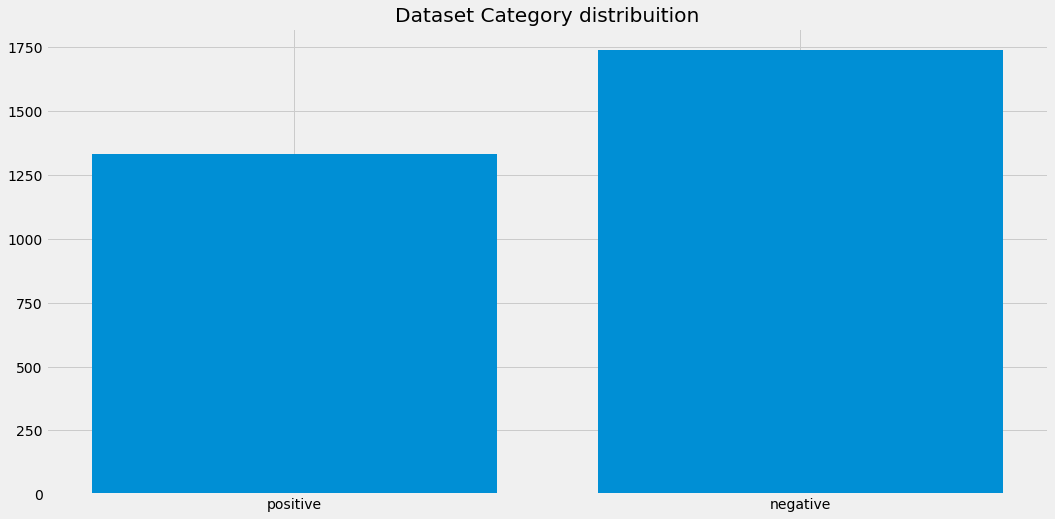

In [ ]:
visualization.plot_category_counts(df['category'])

In [ ]:
#temp
# df['sub-category'].value_counts()
# df_sub = preprocessing.drop_na_values_subcategory(df)

# df_sub.head()
# plot_category_counts(df_sub['sub-category'])

### **Step - 2.4 :** Train-Test Split

In [ ]:
df_train, df_test = preprocessing.splitting_train_test(df, TRAIN_SIZE)

encoder, y_train, y_test = preprocessing.labelEncoding_target_variables(df_train, df_test)

TRAIN size: 2458
TEST size: 615


In [ ]:
#word2vec

w2v_model, w2v_weights, w2v_vocab_size, w2v_embedding_size = preprocessing.create_Word2Vec_embedding(df_train)

print("Vocabulary Size: {} - Embedding Dim: {}".format(w2v_vocab_size, w2v_embedding_size))
print('Word2Vec_weights Shape:',w2v_weights.shape)

Vocabulary Size: 1601 - Embedding Dim: 50
Word2Vec_weights Shape: (1601, 50)


In [ ]:
#testing similar words from word2vec embeddings
w2v_model.wv.most_similar("minister")

[('chief', 0.915299654006958),
 ('prime', 0.8990346193313599),
 ('quit', 0.8654210567474365),
 ('sack', 0.8162597417831421),
 ('level', 0.8035041093826294),
 ('drop', 0.8020172715187073),
 ('shah', 0.7901377081871033),
 ('amit', 0.7853471636772156),
 ('member', 0.7699102759361267),
 ('jampk', 0.7634959816932678)]

### **Step - 5.1 :** Token and Vocab Creation

In [ ]:
def tokenizing(df_train):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(df_train.cleaned_sentence)

    vocab_size = len(tokenizer.word_index) + 1
    # print("Total words", vocab_size)

    return tokenizer

tokenizer = tokenizing(df_train) 

Total words 5398
CPU times: user 93.1 ms, sys: 65.3 ms, total: 158 ms
Wall time: 88.4 ms


In [ ]:
def converting_txt2seq(tokenizer, df_train, df_test, SEQUENCE_LENGTH):
    x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.cleaned_sentence), maxlen=SEQUENCE_LENGTH)
    x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.cleaned_sentence), maxlen=SEQUENCE_LENGTH)

    return x_train, x_test

x_train, x_test = preprocessing.converting_txt2seq(tokenizer, df_train, df_test, SEQUENCE_LENGTH)

CPU times: user 52.7 ms, sys: 1.97 ms, total: 54.7 ms
Wall time: 55.9 ms


In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (2458, 150)
y_train (2458, 1)

x_test (615, 150)
y_test (615, 1)


## STEP 5.1.2 Visualizing Word2Vec Embeddings with t-SNE

In [ ]:
plot_n_words = 100
# visualization.plot_word2vec_embedding_by_tsne(w2v_model, w2v_vocab_size, plot_n_words)

### **Step - 5.3 :** Embedding Layer Creation

In [ ]:
W2V_SIZE = 50
embedding_matrix = preprocessing.create_embeddingMatrix_from_Word2Vec(w2v_model, vocab_size, W2V_SIZE, tokenizer)

In [ ]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/model/final/model.h5')

model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           269900    
                                                                 
 dropout (Dropout)           (None, 150, 50)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 390,901
Trainable params: 121,001
Non-trainable params: 269,900
_________________________________________________________________


### **Step - 5.4 :** Model Creation - LSTM

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=w2v_embedding_size,
                    weights=[embedding_matrix],
                    input_length=SEQUENCE_LENGTH,
                    mask_zero=True,
                    trainable=False))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           269900    
                                                                 
 dropout (Dropout)           (None, 150, 50)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 390,901
Trainable params: 121,001
Non-trainable params: 269,900
_________________________________________________________________


### **Step - 5.5 :** Compiling Model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

### **Step - 5.6 :** Callback Creation

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

### **Step - 5.7 :** Model Training 

In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=2,
                    validation_split=0.1,
                    verbose=1
                    )

Epoch 1/2
70/70 [==============================] - 47s 567ms/step - loss: 0.5240 - accuracy: 0.7306 - val_loss: 0.5368 - val_accuracy: 0.7520
Epoch 2/2
70/70 [==============================] - 37s 525ms/step - loss: 0.4877 - accuracy: 0.7523 - val_loss: 0.4992 - val_accuracy: 0.7642
CPU times: user 2min 23s, sys: 5.38 s, total: 2min 28s
Wall time: 1min 23s


### **Step - 5.8 :** Model Evaluation 

In [ ]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

5/5 [==============================] - 1s 180ms/step - loss: 0.4740 - accuracy: 0.7935

ACCURACY: 0.7934959530830383
LOSS: 0.47398999333381653
CPU times: user 1.73 s, sys: 50 ms, total: 1.78 s
Wall time: 1.32 s


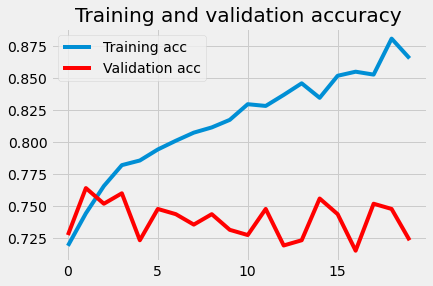

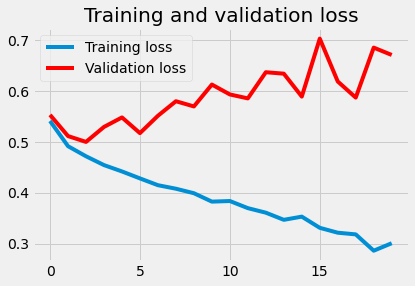

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
def pred_score2label(y_pred_score):
    y_pred_conf_score,y_pred_num , y_pred_label = [], [], []
    for i in y_pred_score:
        if i<=0.5:
            pred_label = 0
            pred_score = i + 0.5
        else:
            pred_label = 1
            pred_score = i

        y_pred_conf_score.append(pred_score)

        pred_li_temp = [pred_label]
        y_pred_temp =  list(encoder.inverse_transform(pred_li_temp) )

        y_pred_label.append(y_pred_temp)
    return y_pred_conf_score, y_pred_label

y_pred_score = model_loaded.predict(x_test)
y_pred_conf_score, y_pred_label = pred_score2label(y_pred_score)


    # print(type(i))

In [ ]:
# (y_pred_num[:4], y_pred_label[:4])
y_test = [i[0] for i in y_test]
y_test[:4], y_pred_conf_score[:4]

NameError: ignored

In [ ]:
# x_test = [i[0] for i in x_test]

In [ ]:
(x_test)

array([[   0,    0,    0, ...,   69,   33,   66],
       [   0,    0,    0, ..., 2588,  307,  668],
       [   0,    0,    0, ...,  458,  458,   72],
       ...,
       [   0,    0,    0, ...,  598, 2114, 1392],
       [   0,    0,    0, ...,   30, 1938,  519],
       [   0,    0,    0, ...,    0,    2,    5]], dtype=int32)

In [ ]:
def output_pred_csv(df_test, y_pred_conf_score, y_pred_label):

    sent = df_test.cleaned_sentence.tolist()
    y_pred_conf_score = [i[0] for i in y_pred_conf_score]
    y_pred_label = [i[0] for i in y_pred_label]

    pred_df = pd.DataFrame(list(zip(sent, y_pred_conf_score, y_pred_label)), columns =['Sentence', 'confidence_score', 'y_pred_label'])
    # pred_df.to_csv(r'/content/pred_df.csv', index=False)

    return pred_df

output_pred_csv(df_test, y_pred_conf_score, y_pred_label)    

,Sentence,confidence_score,y_pred_label
0,people not happy pay attention thisi think bes...,0.582719,negative
1,big news expose kapil mishra kapil ji go ahead...,0.588256,positive
2,misleading water fund public kejriwal work get...,0.732085,positive
3,first make unity party go country,0.639716,positive
4,asianet wonderful job people report well good ...,0.889642,negative
5,delhi model simply mean settlement rohingya ba...,0.732046,positive
6,kejriwal government not anything development d...,0.702646,positive
7,havent see anyone kinda mentility,0.737423,negative
8,arvind kejriwals trick win election offer free...,0.754601,negative
9,kejriwal fraudulent delhi model education expo...,0.701678,positive


KeyError: ignored

In [ ]:
print(classification_report(y_test, y_pred_num))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       321
           1       0.75      0.80      0.77       270

    accuracy                           0.79       591
   macro avg       0.78      0.79      0.78       591
weighted avg       0.79      0.79      0.79       591



In [ ]:
confusion_matrix(y_test, y_pred_conf_score)

ValueError: ignored

### **Step - 5.9 :** Prediction using Model 

In [ ]:
predict("I will kill you")

UnboundLocalError: ignored

In [ ]:
predict("I have nothing to lose")

{'label': 'NEGATIVE',
 'score': 0.23089268803596497,
 'elapsed_time': 0.09041810035705566}

In [ ]:
predict("Experience has been bad")

{'label': 'NEGATIVE',
 'score': 0.11358091235160828,
 'elapsed_time': 0.08837652206420898}

### **Step - 5.10 :** Creating Confusion Matrix 

In [ ]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.category)
scores = model.predict(x_test, verbose=1, batch_size=32)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

19/19 [==============================] - 3s 130ms/step
CPU times: user 3.09 s, sys: 51.3 ms, total: 3.15 s
Wall time: 2.56 s


In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

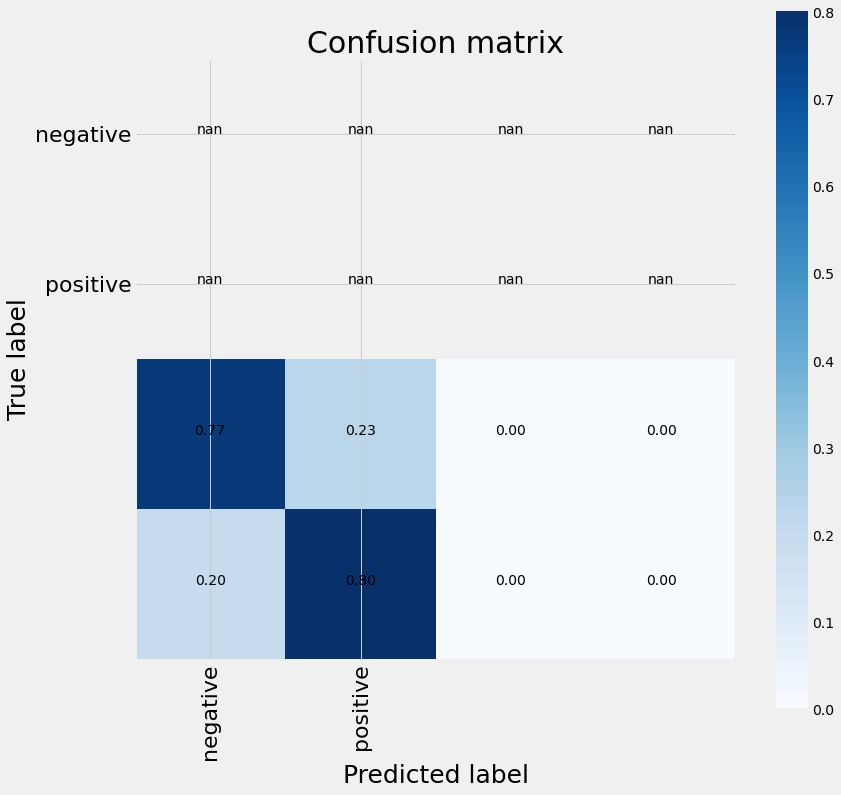

CPU times: user 297 ms, sys: 5.12 ms, total: 302 ms
Wall time: 303 ms


In [ ]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.category.unique(), title="Confusion matrix")
plt.show()

### **Step - 5.11 :** Classification Report 

In [ ]:

print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00       0.0
    POSITIVE       0.00      0.00      0.00       0.0
    negative       0.00      0.00      0.00     321.0
    positive       0.00      0.00      0.00     270.0

    accuracy                           0.00     591.0
   macro avg       0.00      0.00      0.00     591.0
weighted avg       0.00      0.00      0.00     591.0



### **Step - 5.12 :** Accuracy Score 

In [ ]:
accuracy_score(y_test_1d, y_pred_1d)

### **Step - 5.13 :** Saving Model for future use 

In [ ]:
model_path = '/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/model/model.h5'
TOKENIZER_MODEL = "/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/model/tokenizer.pkl"


model.save(model_path)
# w2v_model.save(WORD2VEC_MODEL)
# pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
# pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

## **References:**

* **LSTM Overview** : [**Link**](https://www.analyticsvidhya.com/blog/2022/03/an-overview-on-long-short-term-memory-lstm/)
* **Code Optimisation Techniques** : [**Link**](https://www.geeksforgeeks.org/optimization-tips-python-code/)